In [4]:
import torch
import os
import matplotlib.pyplot as plt
from utils.data_loader import get_dataloaders
from models.dense_baseline import get_baseline
from models.moe_model import MoEModel
from utils.visualization import HistoryLogger, plot_learning_curves, plot_expert_utilization, compare_params_vs_performance, plot_expert_heatmap
from train import train_baseline, train_moe

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

Using device: cuda


In [5]:
# Load Data
# Using a reduced batch size if running on CPU, defaults to 128
batch_size = 64
train_loader, val_loader, test_loader, num_classes, img_size = get_dataloaders(batch_size=batch_size)

print(f"Num Classes: {num_classes}, Image Size: {img_size}")

Loaded CIFAR-10: 45000 train, 5000 val, 10000 test images.
Num Classes: 10, Image Size: (3, 32, 32)


In [6]:
# Configuration for the test run
epochs = 10
save_dir = './test_results'
os.makedirs(save_dir, exist_ok=True)

# 1. Train MoE Model (Top-1)
print("=== Training MoE Model (Top-1) ===")
moe_model_top1 = MoEModel(num_experts=4, num_classes=num_classes, input_channels=img_size[0], top_k=1).to(device)
moe_top1_save_path = os.path.join(save_dir, 'moe_model_top1.pth')

train_moe(moe_model_top1, train_loader, val_loader, test_loader, epochs, device, moe_top1_save_path, aux_weight=3.0)

=== Training MoE Model (Top-1) ===
Starting MoE training on cuda with aux_weight=3.0, Top-K=1


Epoch 1/10: 100%|██████████| 704/704 [00:06<00:00, 101.87it/s, loss=2.15, acc=25.9]


Epoch 1: Train: 25.87% | Val: 29.22% | Test: 25.08%
   Usage: [E0:9.3% | E1:45.7% | E2:44.7% | E3:0.2%]


Epoch 2/10: 100%|██████████| 704/704 [00:08<00:00, 78.30it/s, loss=1.84, acc=33.5]


Epoch 2: Train: 33.46% | Val: 37.98% | Test: 37.66%
   Usage: [E0:24.3% | E1:27.4% | E2:30.5% | E3:17.8%]


Epoch 3/10: 100%|██████████| 704/704 [00:09<00:00, 77.10it/s, loss=1.66, acc=40.5]


Epoch 3: Train: 40.53% | Val: 45.02% | Test: 45.76%
   Usage: [E0:24.0% | E1:27.2% | E2:26.5% | E3:22.4%]


Epoch 4/10: 100%|██████████| 704/704 [00:09<00:00, 76.99it/s, loss=1.55, acc=45.2]


Epoch 4: Train: 45.19% | Val: 46.26% | Test: 47.38%
   Usage: [E0:27.4% | E1:26.2% | E2:26.1% | E3:20.3%]


Epoch 5/10: 100%|██████████| 704/704 [00:09<00:00, 76.39it/s, loss=1.42, acc=49.6]


Epoch 5: Train: 49.61% | Val: 49.90% | Test: 53.55%
   Usage: [E0:24.5% | E1:25.2% | E2:26.0% | E3:24.3%]


Epoch 6/10: 100%|██████████| 704/704 [00:09<00:00, 77.22it/s, loss=1.34, acc=52.7]


Epoch 6: Train: 52.73% | Val: 54.40% | Test: 56.68%
   Usage: [E0:24.4% | E1:25.8% | E2:25.9% | E3:23.9%]


Epoch 7/10: 100%|██████████| 704/704 [00:09<00:00, 76.63it/s, loss=1.22, acc=57.3]


Epoch 7: Train: 57.32% | Val: 57.08% | Test: 58.59%
   Usage: [E0:25.3% | E1:26.0% | E2:24.2% | E3:24.6%]


Epoch 8/10: 100%|██████████| 704/704 [00:08<00:00, 78.28it/s, loss=1.12, acc=61.1]


Epoch 8: Train: 61.13% | Val: 61.56% | Test: 62.95%
   Usage: [E0:24.2% | E1:25.3% | E2:26.2% | E3:24.3%]


Epoch 9/10: 100%|██████████| 704/704 [00:09<00:00, 76.24it/s, loss=1.03, acc=64]  


Epoch 9: Train: 63.99% | Val: 64.56% | Test: 66.33%
   Usage: [E0:24.4% | E1:25.8% | E2:26.1% | E3:23.8%]


Epoch 10/10: 100%|██████████| 704/704 [00:09<00:00, 76.36it/s, loss=0.961, acc=66.5]


Epoch 10: Train: 66.54% | Val: 66.06% | Test: 68.03%
   Usage: [E0:24.2% | E1:26.1% | E2:25.1% | E3:24.6%]
MoE Training finished. Final Test Accuracy: 68.03%


In [7]:
# 1b. Train MoE Model (Top-2)
print("=== Training MoE Model (Top-2) ===")
moe_model_top2 = MoEModel(num_experts=4, num_classes=num_classes, input_channels=img_size[0], top_k=2).to(device)
moe_top2_save_path = os.path.join(save_dir, 'moe_model_top2.pth')

train_moe(moe_model_top2, train_loader, val_loader, test_loader, epochs, device, moe_top2_save_path, aux_weight=3.0)

=== Training MoE Model (Top-2) ===
Starting MoE training on cuda with aux_weight=3.0, Top-K=2


Epoch 1/10: 100%|██████████| 704/704 [00:07<00:00, 92.33it/s, loss=2.03, acc=29.6] 


Epoch 1: Train: 29.64% | Val: 40.20% | Test: 43.67%
   Usage: [E0:40.2% | E1:0.2% | E2:25.7% | E3:33.9%]


Epoch 2/10: 100%|██████████| 704/704 [00:08<00:00, 79.53it/s, loss=1.64, acc=41.1]


Epoch 2: Train: 41.14% | Val: 44.28% | Test: 47.28%
   Usage: [E0:33.7% | E1:16.4% | E2:20.3% | E3:29.6%]


Epoch 3/10: 100%|██████████| 704/704 [00:08<00:00, 82.07it/s, loss=1.5, acc=46.8] 


Epoch 3: Train: 46.76% | Val: 49.88% | Test: 53.32%
   Usage: [E0:32.6% | E1:23.7% | E2:19.0% | E3:24.8%]


Epoch 4/10: 100%|██████████| 704/704 [00:08<00:00, 79.40it/s, loss=1.39, acc=50.7]


Epoch 4: Train: 50.74% | Val: 51.20% | Test: 55.16%
   Usage: [E0:30.4% | E1:26.4% | E2:17.8% | E3:25.4%]


Epoch 5/10: 100%|██████████| 704/704 [00:09<00:00, 77.97it/s, loss=1.3, acc=54.1] 


Epoch 5: Train: 54.10% | Val: 57.72% | Test: 60.73%
   Usage: [E0:31.8% | E1:25.0% | E2:18.4% | E3:24.7%]


Epoch 6/10: 100%|██████████| 704/704 [00:08<00:00, 81.08it/s, loss=1.21, acc=57.2]


Epoch 6: Train: 57.18% | Val: 61.32% | Test: 63.12%
   Usage: [E0:31.5% | E1:25.7% | E2:17.6% | E3:25.3%]


Epoch 7/10: 100%|██████████| 704/704 [00:09<00:00, 74.28it/s, loss=1.13, acc=60.6]


Epoch 7: Train: 60.61% | Val: 63.62% | Test: 65.75%
   Usage: [E0:32.0% | E1:25.0% | E2:18.3% | E3:24.7%]


Epoch 8/10: 100%|██████████| 704/704 [00:08<00:00, 78.44it/s, loss=1.04, acc=63.7]


Epoch 8: Train: 63.70% | Val: 64.28% | Test: 67.39%
   Usage: [E0:31.7% | E1:25.7% | E2:18.4% | E3:24.1%]


Epoch 9/10: 100%|██████████| 704/704 [00:09<00:00, 75.43it/s, loss=0.956, acc=67.2]


Epoch 9: Train: 67.16% | Val: 68.60% | Test: 70.37%
   Usage: [E0:31.8% | E1:25.6% | E2:18.4% | E3:24.1%]


Epoch 10/10: 100%|██████████| 704/704 [00:09<00:00, 75.32it/s, loss=0.903, acc=68.6]


Epoch 10: Train: 68.58% | Val: 70.54% | Test: 71.83%
   Usage: [E0:32.3% | E1:25.1% | E2:18.1% | E3:24.5%]
MoE Training finished. Final Test Accuracy: 71.83%


In [8]:
# 1b. Train MoE Model (Top-22)
print("=== Training MoE Model (Top-22) ===")
moe_model_top22 = MoEModel(num_experts=8, num_classes=num_classes, input_channels=img_size[0], top_k=2).to(device)
moe_top22_save_path = os.path.join(save_dir, 'moe_model_top22.pth')

train_moe(moe_model_top22, train_loader, val_loader, test_loader, epochs, device, moe_top22_save_path, aux_weight=3.0)

=== Training MoE Model (Top-22) ===
Starting MoE training on cuda with aux_weight=3.0, Top-K=2


Epoch 1/10: 100%|██████████| 704/704 [00:14<00:00, 50.09it/s, loss=2.01, acc=28.6]


Epoch 1: Train: 28.60% | Val: 36.24% | Test: 37.99%
   Usage: [E0:23.2% | E1:16.4% | E2:4.0% | E3:13.5% | E4:7.2% | E5:16.7% | E6:11.8% | E7:7.2%]


Epoch 2/10: 100%|██████████| 704/704 [00:14<00:00, 49.51it/s, loss=1.7, acc=38.7] 


Epoch 2: Train: 38.71% | Val: 44.64% | Test: 47.80%
   Usage: [E0:14.8% | E1:12.1% | E2:7.6% | E3:12.4% | E4:8.5% | E5:20.8% | E6:13.5% | E7:10.3%]


Epoch 3/10: 100%|██████████| 704/704 [00:13<00:00, 50.64it/s, loss=1.59, acc=43.2]


Epoch 3: Train: 43.23% | Val: 45.82% | Test: 47.85%
   Usage: [E0:13.2% | E1:15.6% | E2:5.2% | E3:10.2% | E4:11.3% | E5:17.2% | E6:15.1% | E7:12.2%]


Epoch 4/10: 100%|██████████| 704/704 [00:14<00:00, 49.89it/s, loss=1.5, acc=46.4] 


Epoch 4: Train: 46.43% | Val: 52.76% | Test: 55.82%
   Usage: [E0:14.7% | E1:15.0% | E2:6.7% | E3:7.1% | E4:12.8% | E5:17.3% | E6:12.7% | E7:13.7%]


Epoch 5/10: 100%|██████████| 704/704 [00:14<00:00, 49.74it/s, loss=1.4, acc=50.7] 


Epoch 5: Train: 50.70% | Val: 53.54% | Test: 57.43%
   Usage: [E0:16.0% | E1:16.9% | E2:5.9% | E3:6.2% | E4:7.7% | E5:17.3% | E6:12.9% | E7:17.2%]


Epoch 6/10: 100%|██████████| 704/704 [00:13<00:00, 50.42it/s, loss=1.31, acc=54]  


Epoch 6: Train: 53.99% | Val: 56.46% | Test: 59.61%
   Usage: [E0:16.1% | E1:17.3% | E2:4.2% | E3:3.9% | E4:8.2% | E5:20.0% | E6:13.2% | E7:17.1%]


Epoch 7/10: 100%|██████████| 704/704 [00:14<00:00, 49.93it/s, loss=1.22, acc=57.5]


Epoch 7: Train: 57.52% | Val: 58.84% | Test: 63.87%
   Usage: [E0:16.6% | E1:19.2% | E2:3.2% | E3:3.2% | E4:8.3% | E5:20.3% | E6:13.0% | E7:16.4%]


Epoch 8/10: 100%|██████████| 704/704 [00:13<00:00, 50.98it/s, loss=1.13, acc=61.1]


Epoch 8: Train: 61.08% | Val: 63.20% | Test: 66.64%
   Usage: [E0:17.3% | E1:19.5% | E2:3.3% | E3:2.2% | E4:8.8% | E5:21.2% | E6:12.7% | E7:15.0%]


Epoch 9/10: 100%|██████████| 704/704 [00:13<00:00, 51.84it/s, loss=1.05, acc=64]  


Epoch 9: Train: 64.05% | Val: 66.34% | Test: 69.40%
   Usage: [E0:17.5% | E1:19.1% | E2:3.2% | E3:1.6% | E4:7.1% | E5:21.8% | E6:14.7% | E7:15.1%]


Epoch 10/10: 100%|██████████| 704/704 [00:13<00:00, 52.00it/s, loss=0.988, acc=66.3]


Epoch 10: Train: 66.35% | Val: 68.10% | Test: 70.09%
   Usage: [E0:17.7% | E1:19.6% | E2:2.6% | E3:1.4% | E4:6.3% | E5:21.7% | E6:15.1% | E7:15.6%]
MoE Training finished. Final Test Accuracy: 70.09%


In [ ]:
# 2. Train Baseline (Width x1.0)
print("\n=== Training Baseline (Width x1.0) ===")
baseline_w1 = get_baseline(input_shape=img_size, num_classes=num_classes, width_multiplier=1.0).to(device)
baseline_w1_save_path = os.path.join(save_dir, 'baseline_w1.0.pth')

train_baseline(baseline_w1, train_loader, val_loader, test_loader, epochs, device, baseline_w1_save_path)

In [ ]:
# 3. Train Baseline (Width x2.0)
print("\n=== Training Baseline (Width x2.0) ===")
baseline_w2 = get_baseline(input_shape=img_size, num_classes=num_classes, width_multiplier=2.0).to(device)
baseline_w2_save_path = os.path.join(save_dir, 'baseline_w2.0.pth')

train_baseline(baseline_w2, train_loader, val_loader, test_loader, epochs, device, baseline_w2_save_path)

In [10]:
# Load Histories
moe_top1_hist_path = moe_top1_save_path.replace('.pth', '_history.json')
moe_top2_hist_path = moe_top2_save_path.replace('.pth', '_history.json')
moe_top22_hist_path = moe_top22_save_path.replace('.pth', '_history.json')
# base_w1_hist_path = baseline_w1_save_path.replace('.pth', '_history.json')
# base_w2_hist_path = baseline_w2_save_path.replace('.pth', '_history.json')

history_moe_top1 = HistoryLogger.load(moe_top1_hist_path).history
history_moe_top2 = HistoryLogger.load(moe_top2_hist_path).history
history_moe_top22 = HistoryLogger.load(moe_top22_hist_path).history
# history_base_w1 = HistoryLogger.load(base_w1_hist_path).history
# history_base_w2 = HistoryLogger.load(base_w2_hist_path).history

print("Histories loaded.")

Histories loaded.


In [ ]:
# Visualization: 4-Way Comparison
epochs_range = range(1, len(history_moe_top1['train_acc']) + 1)

plt.figure(figsize=(12, 6))

# Plot Validation Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, history_moe_top1['val_acc'], label='MoE (Top-1)', linewidth=2, marker='o')
plt.plot(epochs_range, history_moe_top2['val_acc'], label='MoE (Top-2)', linewidth=2, marker='^', linestyle='--')
plt.plot(epochs_range, history_base_w1['val_acc'], label='Baseline (x1.0)', linestyle='--', marker='x')
plt.plot(epochs_range, history_base_w2['val_acc'], label='Baseline (x2.0)', linestyle='-.', marker='s')
plt.title('Validation Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.grid(True)

# Plot Validation Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, history_moe_top1['val_loss'], label='MoE (Top-1)', linewidth=2, marker='o')
plt.plot(epochs_range, history_moe_top2['val_loss'], label='MoE (Top-2)', linewidth=2, marker='^', linestyle='--')
plt.plot(epochs_range, history_base_w1['val_loss'], label='Baseline (x1.0)', linestyle='--', marker='x')
plt.plot(epochs_range, history_base_w2['val_loss'], label='Baseline (x2.0)', linestyle='-.', marker='s')
plt.title('Validation Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

Expert Utilization Plot (Top-1):


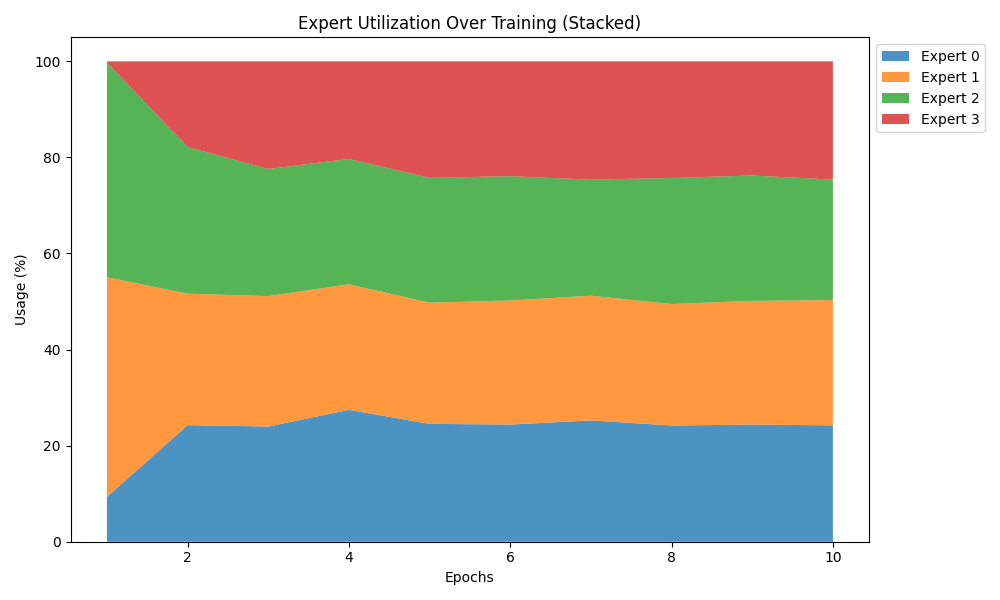

In [11]:
# Visualization: Expert Utilization (Top-1 Model)
from IPython.display import Image, display

# Call the library function
plot_expert_utilization(HistoryLogger.load(moe_top1_hist_path), save_dir)

# Display the saved image
print("Expert Utilization Plot (Top-1):")
display(Image(filename=os.path.join(save_dir, 'expert_utilization_evolution.png')))

Expert Utilization Plot (Top-2):


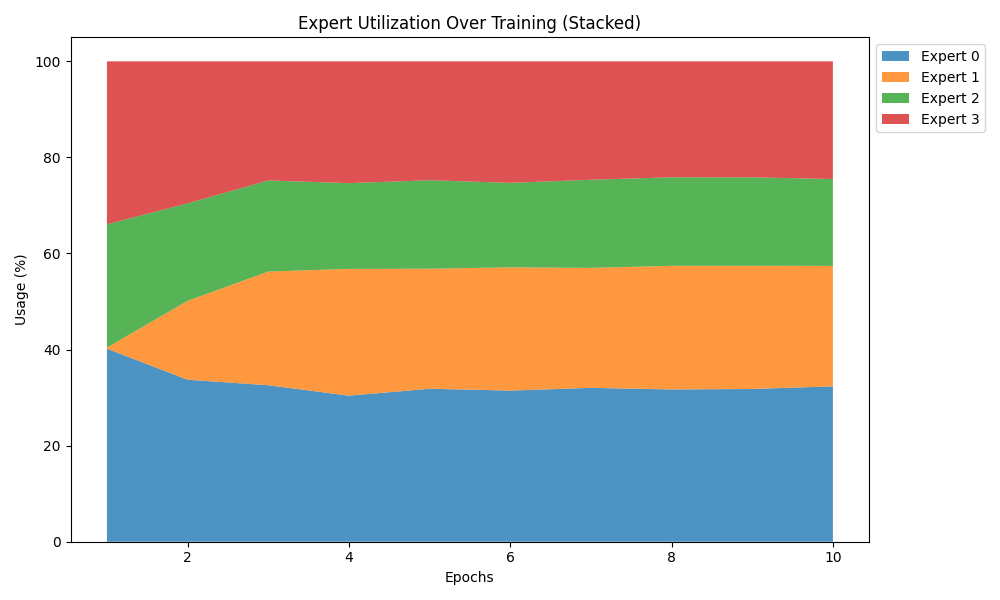

In [12]:
# Visualization: Expert Utilization (Top-2 Model)
from IPython.display import Image, display

# Call the library function
plot_expert_utilization(HistoryLogger.load(moe_top2_hist_path), save_dir)

# Display the saved image
print("Expert Utilization Plot (Top-2):")
display(Image(filename=os.path.join(save_dir, 'expert_utilization_evolution.png')))

In [13]:
# Visualization: Parameters vs Performance (Storage vs Compute)

def count_total_params(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

def count_active_params_moe(model):
    # Active = Router + k * Expert
    router_params = sum(p.numel() for p in model.router.parameters())
    # Assuming all experts are identical, multiplied by k active experts
    expert_params = sum(p.numel() for p in model.experts[0].parameters())
    return router_params + (expert_params * model.top_k)

def plot_scatter(data, title, xlabel, save_name):
    plt.figure(figsize=(10, 7))
    for m in data:
        plt.scatter(m['params'], m['accuracy'], s=100, label=m['name'])
        # Add a small offset to text so it doesn't overlap the dot
        plt.text(m['params'], m['accuracy'], f"  {m['name']}", fontsize=9, va='center')
    
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Test Accuracy (%)')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend()
    plt.tight_layout()
    plt.savefig(os.path.join(save_dir, save_name))
    plt.show()

# 1. Prepare Data for Storage (Total Parameters)
# Shows memory footprint
storage_data = [
    {
        'name': 'MoE (Top-1)',
        'params': count_total_params(moe_model_top1),
        'accuracy': history_moe_top1['val_acc'][-1]
    },
    {
        'name': 'MoE (Top-2)',
        'params': count_total_params(moe_model_top2),
        'accuracy': history_moe_top2['val_acc'][-1]
    },
    {
        'name': 'Baseline (x1.0)',
        'params': count_total_params(baseline_w1),
        'accuracy': history_base_w1['val_acc'][-1]
    },
    {
        'name': 'Baseline (x2.0)',
        'params': count_total_params(baseline_w2),
        'accuracy': history_base_w2['val_acc'][-1]
    }
]

# 2. Prepare Data for Compute (Active Parameters)
# Shows computational efficiency (FLOPs proxy)
compute_data = [
    {
        'name': 'MoE (Top-1)',
        'params': count_active_params_moe(moe_model_top1), # Router + 1 Expert
        'accuracy': history_moe_top1['val_acc'][-1]
    },
    {
        'name': 'MoE (Top-2)',
        'params': count_active_params_moe(moe_model_top2), # Router + 2 Experts
        'accuracy': history_moe_top2['val_acc'][-1]
    },
    {
        'name': 'Baseline (x1.0)',
        'params': count_total_params(baseline_w1), # Dense runs everything
        'accuracy': history_base_w1['val_acc'][-1]
    },
    {
        'name': 'Baseline (x2.0)',
        'params': count_total_params(baseline_w2), # Dense runs everything
        'accuracy': history_base_w2['val_acc'][-1]
    }
]

print("=== Plot 1: Accuracy vs Total Parameters (Storage Cost) ===")
print("Conclusion: MoE requires more memory (Storage), Top-2 same as Top-1.")
plot_scatter(storage_data, 'Accuracy vs. Total Parameters (Storage)', 'Total Parameters', 'acc_vs_storage.png')

print("\n=== Plot 2: Accuracy vs Active Parameters (Inference Cost) ===")
print("Conclusion: MoE is strictly more efficient. Top-2 costs 2x expert compute of Top-1.")
plot_scatter(compute_data, 'Accuracy vs. Active Parameters (FLOPs Proxy)', 'Active Parameters', 'acc_vs_compute.png')

NameError: name 'baseline_w1' is not defined

Plotting Expert Loss for MoE Top-1...


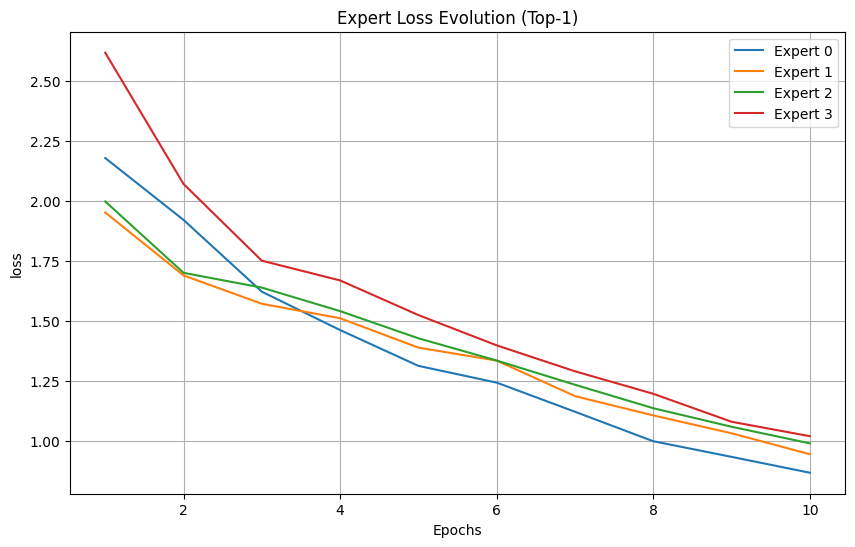

In [14]:
# Visualization: Expert Loss Evolution (Top-1 Model)
import numpy as np

def plot_expert_loss_history(history, title_suffix=""):
    if 'expert_loss' not in history or not history['expert_loss']:
        print("No expert loss data found.")
        return
        
    expert_losses = np.array(history['expert_loss']) # (Epochs, Num_Experts)
    epochs = range(1, expert_losses.shape[0] + 1)
    num_experts = expert_losses.shape[1]
    
    plt.figure(figsize=(10, 6))
    for i in range(num_experts):
        plt.plot(epochs, expert_losses[:, i], label=f'Expert {i}')
        
    plt.title(f'Expert Loss Evolution {title_suffix}')
    plt.xlabel('Epochs')
    plt.ylabel('loss')
    plt.legend()
    plt.grid(True)
    plt.show()

print("Plotting Expert Loss for MoE Top-1...")
plot_expert_loss_history(history_moe_top1, "(Top-1)")

Plotting Expert Specialization for MoE Top-1...


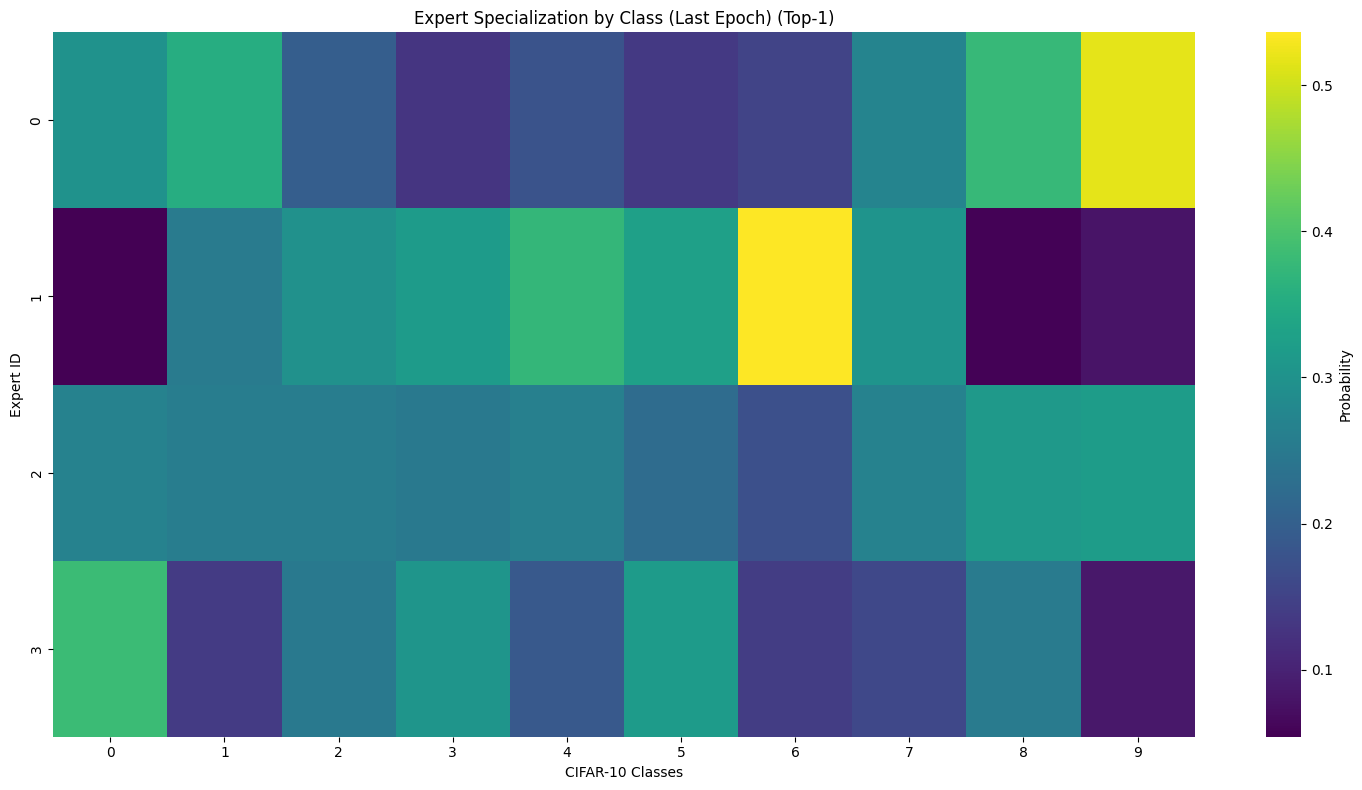

In [15]:
# Visualization: Expert Specialization Heatmap (from History)
import seaborn as sns

def plot_expert_heatmap_from_history(history, title_suffix=""):
    if 'expert_class_distribution' not in history or not history['expert_class_distribution']:
        print("No expert class distribution data found.")
        return
        
    # Get last epoch distribution
    # Shape: (Num_Experts, Num_Classes)
    final_dist = np.array(history['expert_class_distribution'][-1]) 
    
    # Normalize per class (columns) to see which expert dominates a class
    # Add epsilon to avoid divide by zero
    col_sums = final_dist.sum(axis=0, keepdims=True)
    col_sums[col_sums == 0] = 1.0
    heatmap_norm = final_dist / col_sums
    
    plt.figure(figsize=(15, 8))
    sns.heatmap(heatmap_norm, cmap="viridis", cbar_kws={'label': 'Probability'})
    plt.title(f'Expert Specialization by Class (Last Epoch) {title_suffix}')
    plt.xlabel('CIFAR-10 Classes')
    plt.ylabel('Expert ID')
    plt.tight_layout()
    plt.show()

print("Plotting Expert Specialization for MoE Top-1...")
plot_expert_heatmap_from_history(history_moe_top1, "(Top-1)")

Plotting Expert Loss for MoE Top-2...


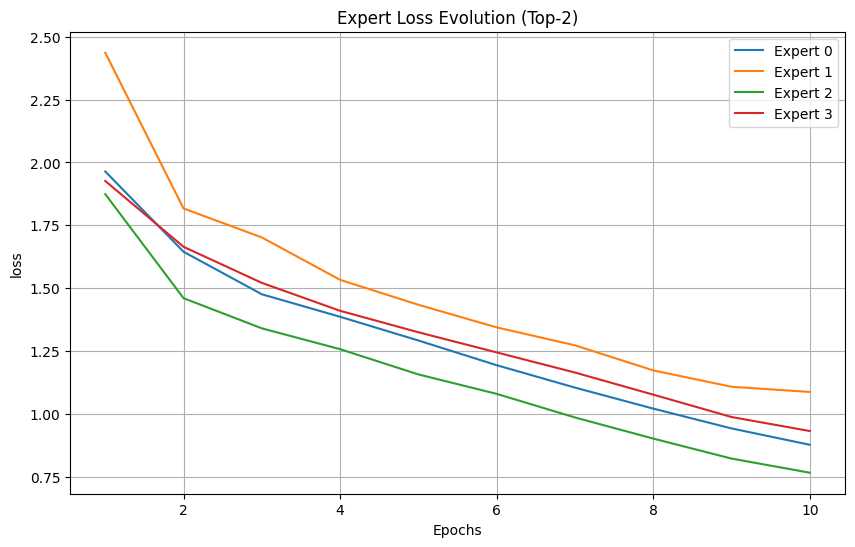

Plotting Expert Specialization for MoE Top-2...


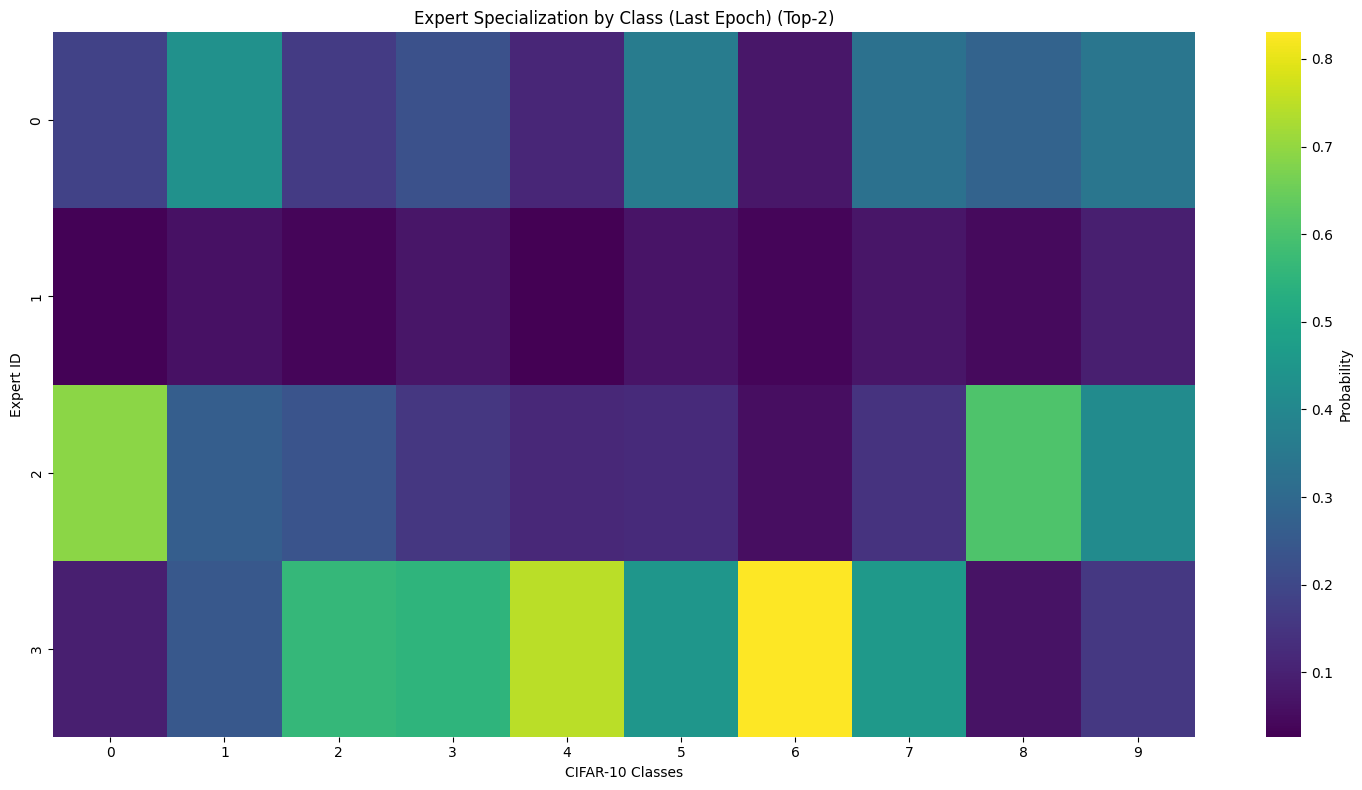

In [16]:
# Visualization for Top-2 Model
print("Plotting Expert Loss for MoE Top-2...")
plot_expert_loss_history(history_moe_top2, "(Top-2)")

print("Plotting Expert Specialization for MoE Top-2...")
plot_expert_heatmap_from_history(history_moe_top2, "(Top-2)")

In [ ]:
# Visualization for Top-2 Model
print("Plotting Expert Loss for MoE Top-22...")
plot_expert_loss_history(history_moe_top22, "(Top-22)")

print("Plotting Expert Specialization for MoE Top-22...")
plot_expert_heatmap_from_history(history_moe_top22, "(Top-22)")